In [29]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv(r'C:\Users\Shakil\Downloads\Compressed\movies_data.csv', encoding='ISO-8859-1')
df.head()

,Movie,Director,Running time,Actor 1,Actor 2,Actor 3,Genre,Budget,Box Office,Actors Box Office %,Director Box Office %,Earnings,Oscar and Golden Globes nominations,Oscar and Golden Globes awards,Release year,IMDb score
0,13 Hours,Michael Bay,144,Toby Stephens,James Badge Dale,David Costabile,Action,50000000,69400000,50.00,69.23,19400000,0,0.0,2016,7.4
1,16 Blocks,Richard Donner,102,Bruce Willis,David Zayas,Sasha Roiz,Action,52000000,65000000,33.33,50.00,13000000,0,0.0,2006,6.6
2,17 Again,Burr Steers,102,Matthew Perry,Hunter Parrish,Thomas Lennon,Comedy,20000000,139000000,44.44,25.00,119000000,0,0.0,2009,6.4
3,1982,Tommy Oliver,90,Bokeem Woodbine,Ruby Dee,Quinton Aaron,Drama,1000000,2000000,50.00,100.00,1000000,0,0.0,2013,7.1
4,2 Fast 2 Furious,John Singleton,107,Paul Walker,Cole Hauser,Mo Gallini,Action,76000000,236000000,75.00,42.85,160000000,0,0.0,2003,5.9


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3974 entries, 0 to 3973
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Movie                                3974 non-null   object 
 1   Director                             3974 non-null   object 
 2   Running time                         3974 non-null   int64  
 3   Actor 1                              3974 non-null   object 
 4   Actor 2                              3974 non-null   object 
 5   Actor 3                              3972 non-null   object 
 6   Genre                                3974 non-null   object 
 7   Budget                               3974 non-null   int64  
 8   Box Office                           3974 non-null   int64  
 9   Actors Box Office %                  3974 non-null   float64
 10  Director Box Office %                3974 non-null   float64
 11  Earnings                      

# Preprocessing

In [41]:
# Convert to millions
df['Budget'] = df['Budget'] / 1e6
df['Box Office'] = df['Box Office'] / 1e6
df['Earnings'] = df['Earnings'] / 1e6

In [42]:
# rename columns
df.rename(columns = {'Budget': 'Budget_in_millions',
                    'Box Office': 'BoxOffice_in_millions',
                    'Earnings': 'Earnings_in_millions'}, inplace=True)

# Analysis & Filtering

In [5]:
# top 5 directors
df['Director'].value_counts().head(5)

Director
Steven Spielberg    26
Woody Allen         21
Clint Eastwood      20
Martin Scorsese     18
Ridley Scott        16
Name: count, dtype: int64

In [6]:
# top 10 movie based on IMDB 

df[['IMDb score', 'Movie']].sort_values(by='IMDb score', ascending=False).head(10)

,IMDb score,Movie
1901,9.3,The Shawshank Redemption
1940,9.2,The Godfather
2792,9.1,Kickboxer: Vengeance
1948,9.0,The Godfather: Part II
1916,9.0,The Dark Knight
1975,8.9,12 Angry Men
3541,8.9,The Good the Bad and the Ugly
3243,8.9,Schindler's List
3143,8.9,Pulp Fiction
1968,8.9,The Lord of the Rings: The Return of the King


In [7]:
# number of movies between rating 8-9
len(df[(df['IMDb score'] >= 8.0) & (df['IMDb score'] < 9.0)])

242

In [9]:
# let's find out 'Christopher Nolan's movie 😃
df.query("Director=='Christopher Nolan'")

,Movie,Director,Running time,Actor 1,Actor 2,Actor 3,Genre,Budget_in_millions,BoxOffice_in_millions,Actors Box Office %,Director Box Office %,Earnings_in_millions,Oscar and Golden Globes nominations,Oscar and Golden Globes awards,Release year,IMDb score
493,Insomnia,Christopher Nolan,118,Al Pacino,Maura Tierney,Crystal Lowe,Drama,46.0,113.0,44.00,100.0,67.0,0,0.0,2002,7.2
995,The Dark Knight Rises,Christopher Nolan,164,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action,250.0,1081.0,100.00,100.0,831.0,0,0.0,2012,8.5
1373,Batman Begins,Christopher Nolan,128,Christian Bale,Liam Neeson,Morgan Freeman,Action,150.0,374.0,86.66,100.0,224.0,1,0.0,2005,8.3
1866,Interstellar,Christopher Nolan,169,Matthew McConaughey,Anne Hathaway,Mackenzie Foy,Adventure,165.0,702.0,51.58,100.0,537.0,6,1.0,2014,8.6
1916,The Dark Knight,Christopher Nolan,152,Christian Bale,Heath Ledger,Morgan Freeman,Action,185.0,1000.0,86.66,100.0,815.0,8,2.0,2008,9.0
1949,The Prestige,Christopher Nolan,130,Christian Bale,Hugh Jackman,Scarlett Johansson,Drama,40.0,109.0,100.00,100.0,69.0,11,3.0,2006,8.5
1952,Inception,Christopher Nolan,148,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,Action,160.0,837.0,66.67,100.0,677.0,12,4.0,2010,8.8
2927,Memento,Christopher Nolan,113,Callum Rennie,Thomas Lennon,Jorja Fox,Mystery,9.0,40.0,69.44,100.0,31.0,5,2.0,2000,8.5


In [10]:
# 5 highest earnings 
df[['Earnings_in_millions', 'Movie']].sort_values(by='Earnings_in_millions', ascending=False).head(5)

,Earnings_in_millions,Movie
1956,2686.0,Avatar
1962,2000.0,Titanic
527,1520.0,Jurassic World
1797,1359.0,Frozen
1721,1299.0,The Avengers


In [11]:
# total movies in a year
df.groupby('Release year').Movie.count().tail()

Release year
2012    170
2013    174
2014    184
2015    152
2016     82
Name: Movie, dtype: int64

In [12]:
# actor wise total movies
movies=df.groupby('Actor 1').Movie.count()
movies.sort_values(ascending=False).head(10)

Actor 1
Robert De Niro       48
Johnny Depp          37
Nicolas Cage         31
J.K. Simmons         30
Matt Damon           29
Denzel Washington    29
Bruce Willis         29
Liam Neeson          28
Harrison Ford        27
Robert Downey Jr.    26
Name: Movie, dtype: int64

# Visualization

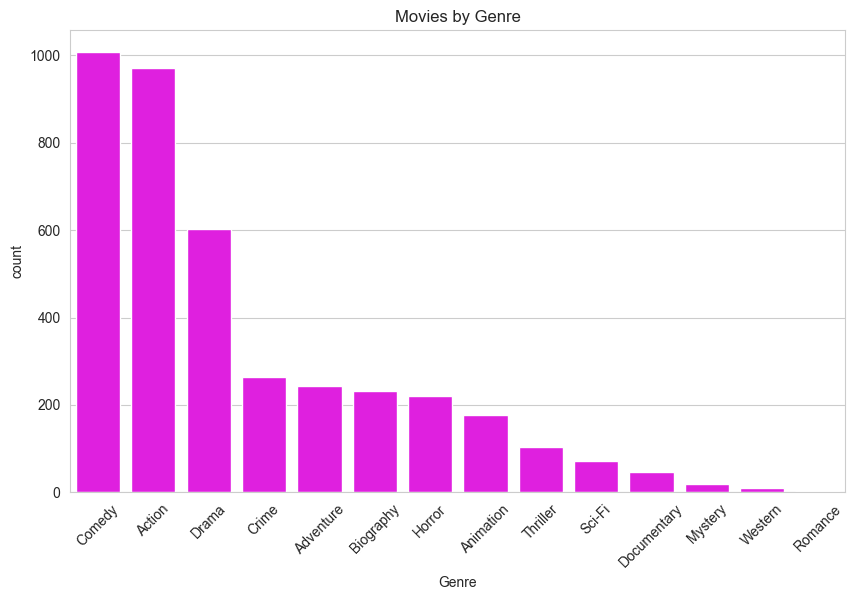

In [96]:
plt.figure(figsize=(10,6))
sns.countplot(x='Genre', data=df, color='magenta', order=df['Genre'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Movies by Genre')
plt.show()

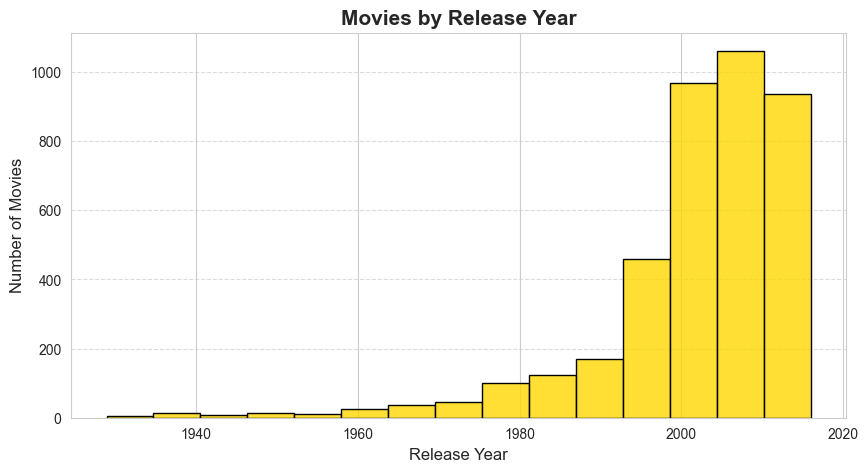

In [75]:
df['Release year'] = pd.to_numeric(df['Release year'], errors='coerce')

sns.set_style('whitegrid')

plt.figure(figsize=(10, 5))
sns.histplot(x='Release year', data=df, bins=15, color='gold', edgecolor='black', alpha=0.8)

plt.title('Movies by Release Year', fontsize=15, weight='bold')
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

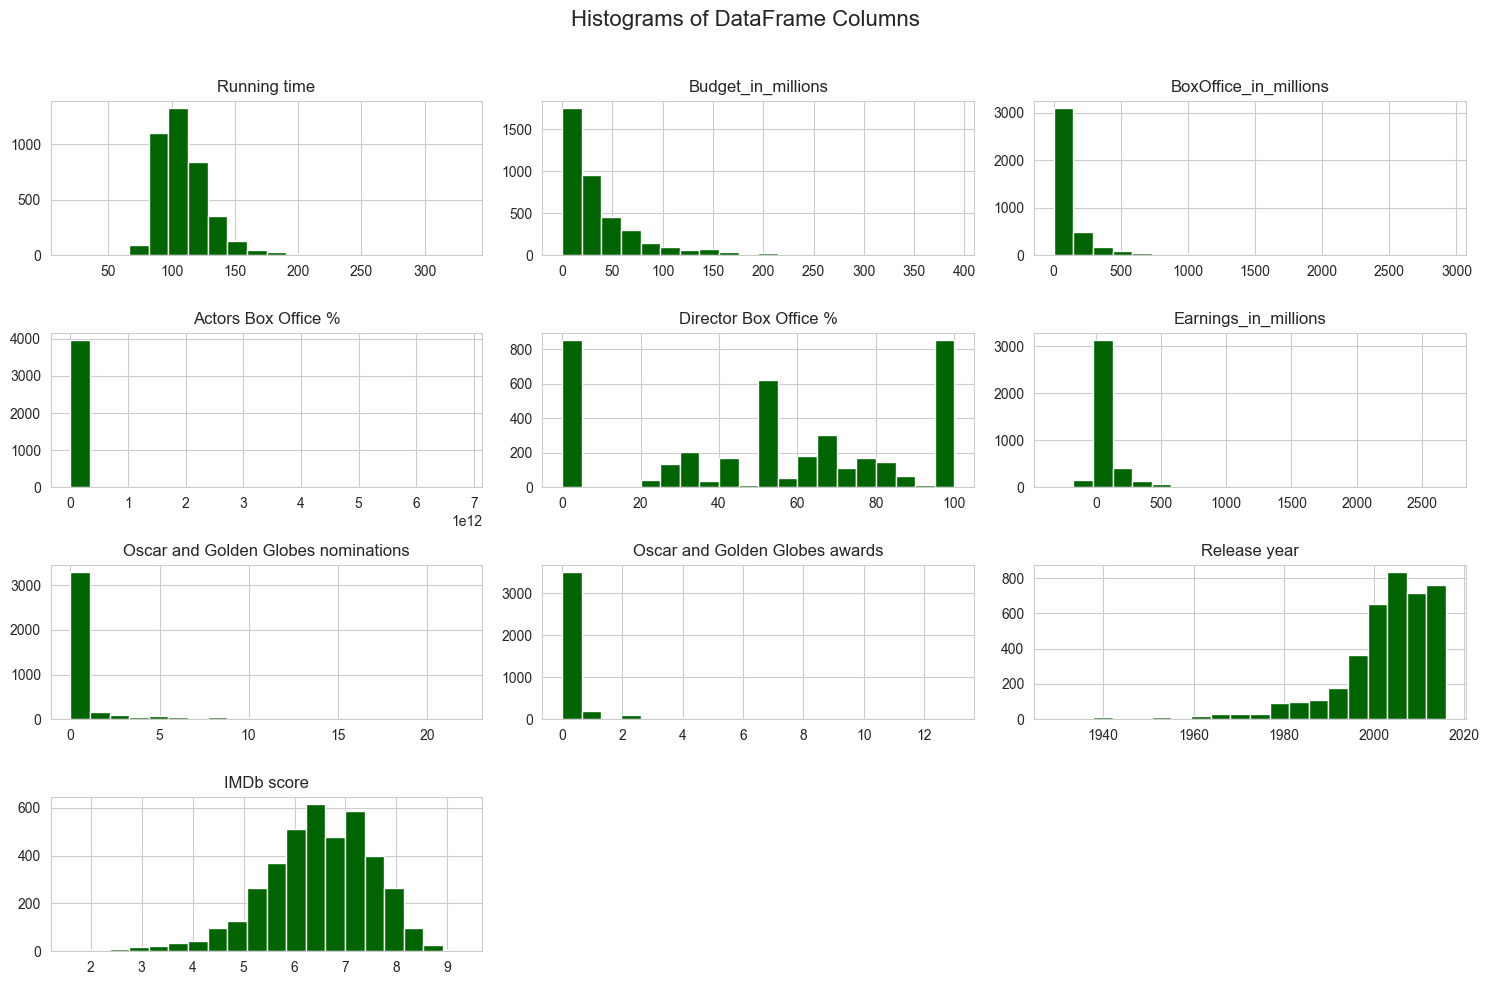

In [73]:
colors = ['darkgreen']

# Create the histograms with specified colors
df.hist(bins=20, figsize=(15, 10), color=colors)

plt.suptitle('Histograms of DataFrame Columns', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the title
plt.show()

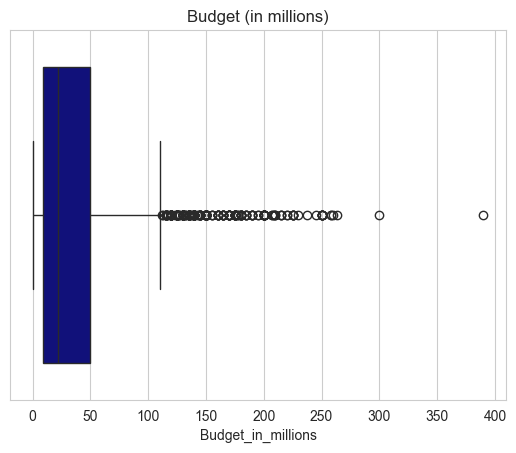

In [76]:
sns.boxplot(x=df['Budget_in_millions'], color='darkblue')
plt.title('Budget (in millions)')
plt.show()

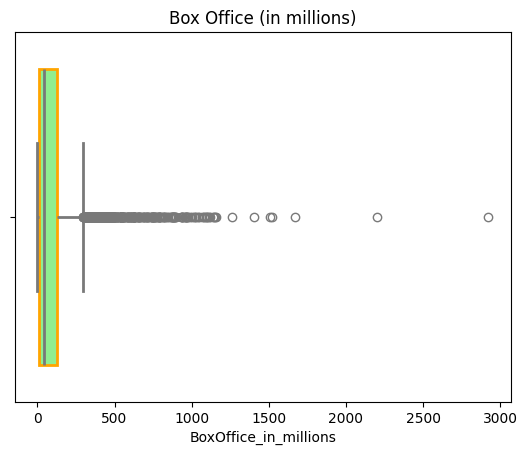

In [53]:
box = sns.boxplot(x=df['BoxOffice_in_millions'], color='lightblue', linewidth=2)

for patch in box.patches:
    patch.set_edgecolor('orange') 
    patch.set_facecolor('lightgreen') 

plt.title('Box Office (in millions)')
plt.show()

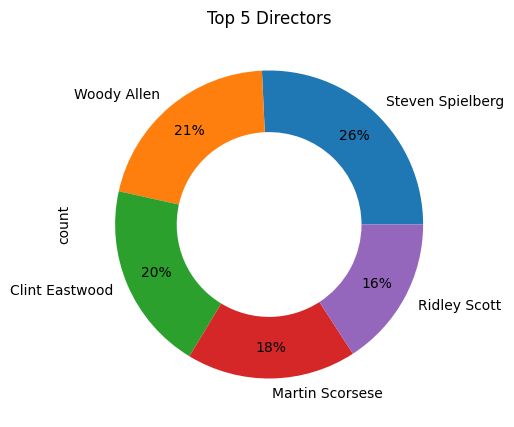

In [18]:
# top 5 directors
df.Director.value_counts().head(5).plot.pie(autopct='%.0f%%', figsize=(5,5), 
                                            pctdistance=0.8, wedgeprops=dict(width=0.4))
plt.title('Top 5 Directors')
plt.show()

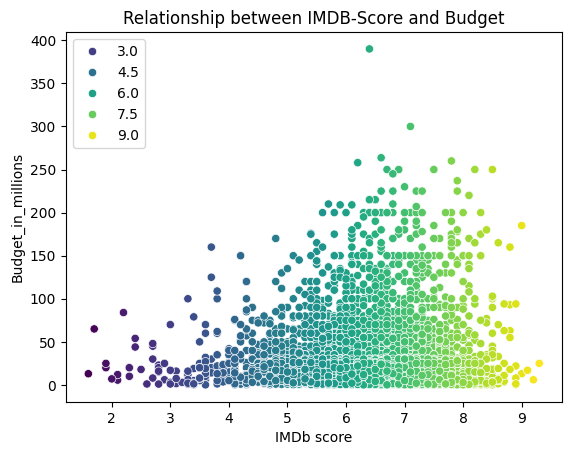

In [44]:
sns.scatterplot(x='IMDb score', y='Budget_in_millions', data=df, hue='IMDb score', palette='viridis')
plt.title('Relationship between IMDB-Score and Budget')
plt.legend(loc='upper left')
plt.show()

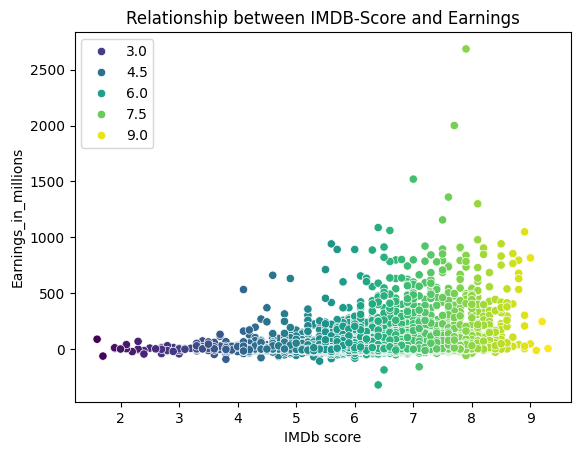

In [46]:
sns.scatterplot(x='IMDb score', y='Earnings_in_millions', data=df, hue='IMDb score', palette='viridis')
plt.title('Relationship between IMDB-Score and Earnings')
plt.legend(loc='upper left')
plt.show()

Now I'm going to find out top highest budget movies and top earned movies

In [23]:

top10_high_budget=df.nlargest(10, 'Budget_in_millions')
top10_earning=df.nlargest(10, 'Earnings_in_millions')

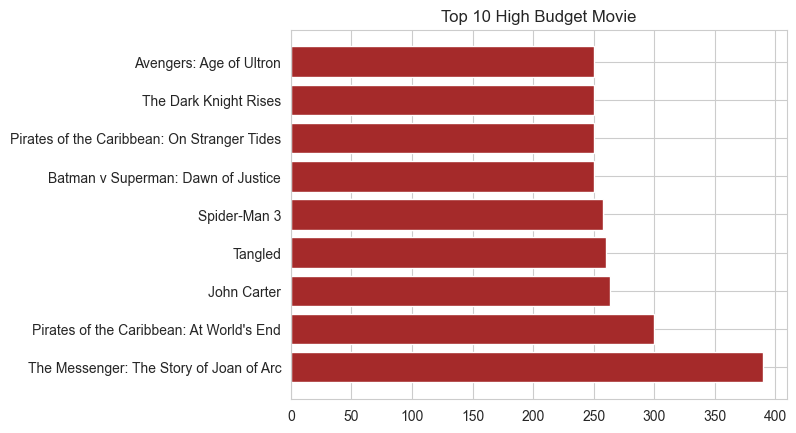

In [84]:
# top 10 high budget movies
plt.barh(top10_high_budget['Movie'], top10_high_budget['Budget_in_millions'], color='brown')
plt.title('Top 10 High Budget Movie')
plt.show()

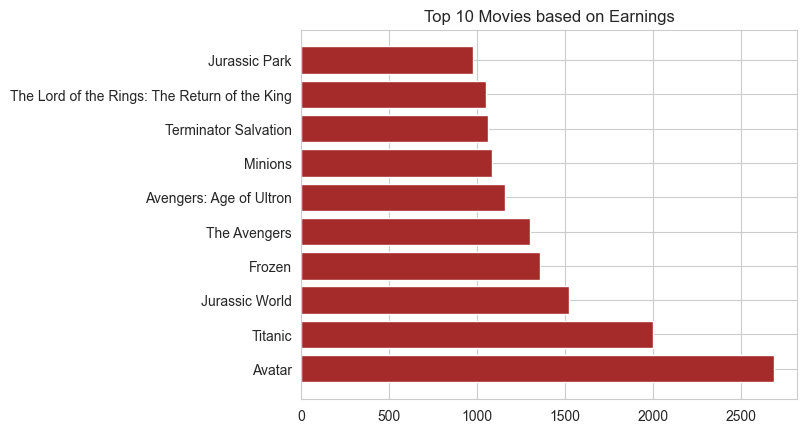

In [85]:
# top 10 movies based on earnings
plt.barh(top10_earning['Movie'], top10_earning['Earnings_in_millions'], color='brown')
plt.title('Top 10 Movies based on Earnings')
plt.show()

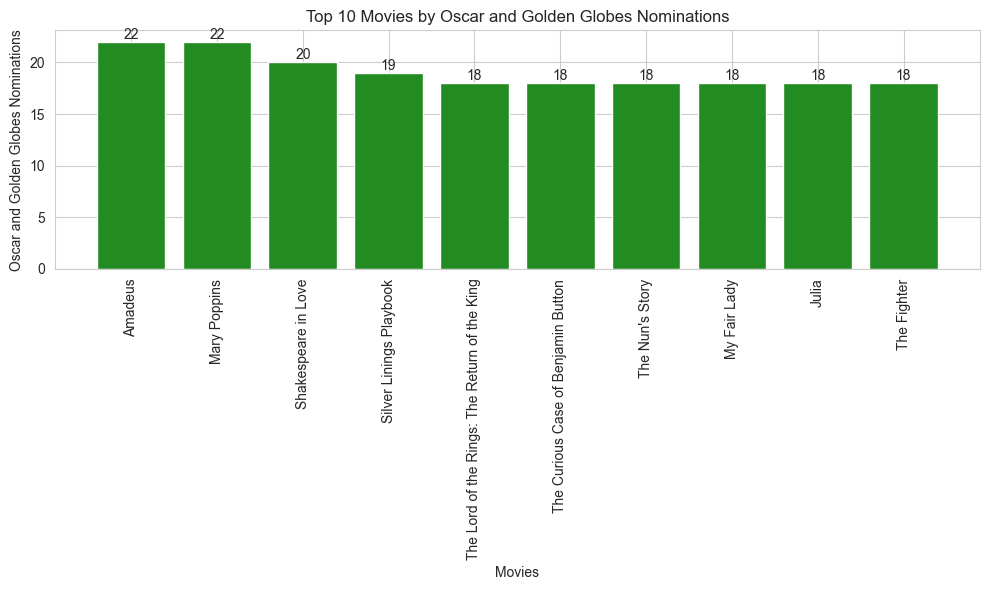

In [94]:
top_10_movies = df[['Movie', 'Oscar and Golden Globes nominations']].sort_values(by='Oscar and Golden Globes nominations', ascending=False).head(10)


plt.figure(figsize=(10,6)) 
bars = plt.bar(top_10_movies['Movie'], top_10_movies['Oscar and Golden Globes nominations'], color='forestgreen')
plt.xticks(rotation=90)

plt.xlabel('Movies')
plt.ylabel('Oscar and Golden Globes Nominations')
plt.title('Top 10 Movies by Oscar and Golden Globes Nominations')

for b in bars:
    yval = b.get_height()
    plt.text(b.get_x() + b.get_width()/2, yval, f'{int(yval)}', ha='center', va='bottom')
plt.tight_layout()